In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 560 kB/s 
     |████████████████████████████████| 465 kB 48.7 MB/s 


In [ ]:
from tqdm.notebook import tqdm
from bs4 import BeautifulSoup
import pandas as pd
import requests
import json
import re
import os
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from wordcloud import WordCloud
from konlpy.tag import Okt
from konlpy.tag import Mecab
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

In [ ]:
total = pd.read_csv('DataBlind.csv') # 널값 확인

#total = total[total['review'].notnull()]
X = total['review']
Y = total['label']

In [ ]:
from sklearn.model_selection import train_test_split
#8:2 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, shuffle = True, stratify=Y, random_state = 0)


In [ ]:
def preprocessing(review):   
    okt = Okt()    
    
    f = open('stward.txt')
    stop_words = f.read().split()  
    review_text = re.sub("[^가-힣\\s]", "", review)  
    word_review = okt.pos(review_text, stem=True)   
    word_review = [(token, pos) for token, pos in word_review if not token in stop_words and len(token) > 1]   
    word_review = [token for token, pos in word_review if pos in ['Noun', 'Verb', 'Adjective']] 
    
    n_gram = [' '.join(word_review[i:i+2]) for i in range(len(word_review)-1)]
     
    word_review += n_gram
    
    return word_review

In [ ]:
#Tf-Idf 벡터화
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
#벡터화 , Tfidf 
tfidf = TfidfVectorizer(tokenizer=preprocessing, max_features=2000, min_df=5, max_df=0.5) #의미 , 최소갯수, 단어장에 포함되기 위한 최대빈도

X_train_tfidf = tfidf.fit_transform(X_train) #문제집

X_test_tfidf = tfidf.transform(X_test) #시험지
X_train_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#모델핸들링 성능향상
import pickle
from google.colab import drive

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection

In [ ]:
# 분류모델을 담을 리스트 생성 
classifiers = []

# random_state 설정
random_state = 2

# 데이터프레임 생성을 위하여 알고리즘 제목 저장
clf_names = ['Decision Tree','Random Forest', 'AdaBoost', 'Extra Trees', 'Gradient Boost',
             'MLP', 'KNN', 'Support Vector', 'Logistic Regression', 'Linear Discrimination']

# 트리 기반 알고리즘
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))

# 그 외 선형, 신경망 등의 알고리즘
classifiers.append(KNeighborsClassifier())
classifiers.append(SVC(random_state=random_state))
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

In [ ]:
kfold = StratifiedKFold(n_splits=10) #n_splits = 10 10번의 교차 검증을 시행하겠다.

cv_results = []
for classifier in classifiers : #크로스 벨리션 스코어를 실행 #교차검증 10번시키고 학습 -> 검증
    cv_results.append(cross_val_score(classifier, X_train_tfidf, y = Y_train,
                                      scoring = "accuracy", cv = kfold, n_jobs=4)) 

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-pack

In [ ]:
cv_results

[array([0.80038265, 0.7940051 , 0.8125    , 0.81505102, 0.80612245,
        0.79846939, 0.78876835, 0.82259094, 0.82195278, 0.80408424]),
 array([0.87882653, 0.86798469, 0.87372449, 0.88711735, 0.8807398 ,
        0.86543367, 0.8787492 , 0.88704531, 0.87364391, 0.87938736]),
 array([0.79145408, 0.79910714, 0.80165816, 0.81760204, 0.80931122,
        0.80165816, 0.79004467, 0.8181238 , 0.82259094, 0.80408424]),
 array([0.88966837, 0.88265306, 0.88647959, 0.89795918, 0.91326531,
        0.87691327, 0.88576899, 0.8972559 , 0.88640715, 0.89853223]),
 array([0.83035714, 0.8252551 , 0.82844388, 0.84757653, 0.84183673,
        0.83673469, 0.83599234, 0.85003191, 0.83535418, 0.84492661]),
 array([0.87053571, 0.87946429, 0.88265306, 0.89604592, 0.89859694,
        0.8622449 , 0.89023612, 0.88257817, 0.88257817, 0.88321634]),
 array([0.83609694, 0.80931122, 0.83928571, 0.85076531, 0.8380102 ,
        0.8067602 , 0.8283344 , 0.84045948, 0.8551372 , 0.8417358 ]),
 array([0.89413265, 0.90242347, 0.

In [ ]:
#하이퍼 파라미터 - 1
# Random Forest 객체 생성
RFC = RandomForestClassifier(random_state=7)


# param_grid 설정
rf_param_grid = {"max_depth": [10,20,30],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300,500],
              "criterion": ["gini"]}

# Grid Search 객체 생성
#param_grid 
gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

# Grid Search 실행
gsRFC.fit(X_train_tfidf,Y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=7), n_jobs=4,
             param_grid={'bootstrap': [False], 'criterion': ['gini'],
                         'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 3, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy', verbose=1)

In [ ]:
# 최적의 파라미터 조합 출력
RFC_best = gsRFC.best_estimator_
print(RFC_best)

# 최고 점수(accuracy) 출력
print(gsRFC.best_score_)

RandomForestClassifier(bootstrap=False, max_depth=30, n_estimators=300,
                       random_state=7)
0.8626571799747339


In [ ]:
cvres = gsRFC.cv_results_
cvres

{'mean_fit_time': array([ 2.71088881,  7.96255915, 13.27127075,  2.61801546,  8.5142828 ,
        13.12604291,  2.58472192,  7.73855751, 12.84192147,  2.51446171,
         7.57534683, 12.64244347,  2.53182387,  8.10225883, 12.91419356,
         2.51949856,  8.25717628, 12.50975752,  2.32359798,  6.9795862 ,
        11.64480455,  2.32775037,  6.99045076, 11.609357  ,  2.33707998,
         6.93332634, 11.63272901,  5.8508182 , 18.05603502, 29.17347744,
         5.65656276, 17.09114895, 28.35068393,  5.33006845, 16.65696683,
        26.57896216,  4.8475477 , 14.57546365, 24.23777285,  4.82140858,
        15.21228211, 24.25765271,  4.82763677, 14.36559916, 23.91692741,
         3.79194105, 11.30917933, 19.57934027,  3.78429863, 11.38397357,
        18.82499249,  3.79223523, 11.34774301, 18.89880359, 10.04359205,
        30.78984342, 50.19075022,  9.63859127, 29.49601574, 47.70234933,
         8.64525385, 26.54785016, 43.23992002,  7.1216764 , 21.2885113 ,
        36.14946971,  7.13832109, 

In [ ]:
df = pd.DataFrame(cvres)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,2.710889,0.135726,0.087914,0.004467,False,gini,10,1,2,100,...,0.844388,0.832270,0.829082,0.827058,0.850032,0.825782,0.846203,0.832675,0.010763,74
1,7.962559,0.149815,0.252500,0.017772,False,gini,10,1,2,300,...,0.855867,0.841837,0.837372,0.831525,0.852585,0.840459,0.848756,0.839565,0.010572,59
2,13.271271,0.303095,0.401956,0.025572,False,gini,10,1,2,500,...,0.855867,0.843112,0.838648,0.831525,0.850032,0.838545,0.850032,0.839883,0.009518,58
3,2.618015,0.076696,0.087549,0.010035,False,gini,10,1,3,100,...,0.846939,0.829082,0.828444,0.827696,0.846203,0.825144,0.844927,0.831655,0.010376,76
4,8.514283,0.799877,0.250537,0.020684,False,gini,10,1,3,300,...,0.855230,0.841837,0.839286,0.833440,0.852585,0.841736,0.848756,0.840713,0.009078,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,14.686380,0.260406,0.316777,0.022763,False,gini,30,10,3,300,...,0.859694,0.855867,0.845663,0.850032,0.859604,0.854499,0.860243,0.852451,0.006383,23
77,24.415388,0.413712,0.525994,0.057420,False,gini,30,10,3,500,...,0.857143,0.857143,0.846939,0.851308,0.860243,0.853223,0.858966,0.852387,0.005866,29
78,4.946408,0.079807,0.112288,0.005093,False,gini,30,10,10,100,...,0.859056,0.856505,0.846301,0.845565,0.863433,0.855775,0.860881,0.852387,0.007186,26
79,14.739065,0.149497,0.299897,0.033548,False,gini,30,10,10,300,...,0.859694,0.855867,0.845663,0.850032,0.859604,0.854499,0.860243,0.852451,0.006383,23


In [ ]:
import numpy as np
cvres = gsRFC.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(mean_score, params)

0.8326753236393472 {'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.8395646253076853 {'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
0.8398832993631402 {'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
0.8316545898831773 {'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}
0.8407127879869243 {'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 300}
0.8400747479910919 {'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 500}
0.832802630465077 {'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10,

In [ ]:
mean_score

0.8523867180886393

In [ ]:
# Logistic Regression 객체 생성
LGS = LogisticRegression(random_state=7)

# param_grid 설정
lgs_param_grid = {'penalty': ['l1','l2'], 
                  'C': np.logspace(0, 4, 10)}

# Gradient boost 객체 생성
gsLGS = GridSearchCV(LGS,param_grid = lgs_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

# Grid Search 실행
gsLGS.fit(X_train_tfidf,Y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Sol

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LogisticRegression(random_state=7), n_jobs=4,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=1)

In [ ]:
# 최적의 파라미터 조합 출력
LGS_best = gsLGS.best_estimator_
print(LGS_best)

# 최고 점수(accuracy) 출력
print(gsLGS.best_score_)


LogisticRegression(C=2.7825594022071245, random_state=7)
0.9091618994438873


In [ ]:
#ExtraTrees 객체 생성
Ext = ExtraTreesClassifier(random_state=7)


# param_grid 설정
ex_param_grid = {"max_depth": [10, 20, 30],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100, 300, 500],
              "criterion": ["gini"]}

# Grad Search 객체 생성
gsExt = GridSearchCV(Ext,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

# Grid Search 실행
gsExt.fit(X_train_tfidf,Y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=ExtraTreesClassifier(random_state=7), n_jobs=4,
             param_grid={'bootstrap': [False], 'criterion': ['gini'],
                         'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 3, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy', verbose=1)

In [ ]:
# 최적의 파라미터 조합 출력
Ext_best = gsExt.best_estimator_
print(Ext_best)

# 최고 점수(accuracy) 출력
print(gsExt.best_score_)

ExtraTreesClassifier(max_depth=30, min_samples_split=10, n_estimators=500,
                     random_state=7)
0.8680798891030566


In [ ]:
#ExtraTrees 객체 생성
Ext = ExtraTreesClassifier(random_state=7)


# param_grid 설정
ex_param_grid = {"max_depth": [None],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100, 300],
              "criterion": ["gini"]}

# Grad Search 객체 생성
gsExt = GridSearchCV(Ext,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

# Grid Search 실행
gsExt.fit(X_train_tfidf,Y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=ExtraTreesClassifier(random_state=7), n_jobs=4,
             param_grid={'bootstrap': [False], 'criterion': ['gini'],
                         'max_depth': [None], 'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 3, 10],
                         'n_estimators': [100, 300]},
             scoring='accuracy', verbose=1)

In [ ]:
# 최적의 파라미터 조합 출력
Ext_best = gsExt.best_estimator_
print(Ext_best)

# 최고 점수(accuracy) 출력
print(gsExt.best_score_)

ExtraTreesClassifier(min_samples_split=10, random_state=7)
0.8918737708867848


In [ ]:
#하이퍼 파라미터 - 1
# Random Forest 객체 생성
RFC = RandomForestClassifier(random_state=7)


# param_grid 설정
rf_param_grid = {"max_depth": [None],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}

# Grid Search 객체 생성
#param_grid 
gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

# Grid Search 실행
gsRFC.fit(X_train_tfidf,Y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=7), n_jobs=4,
             param_grid={'bootstrap': [False], 'criterion': ['gini'],
                         'max_depth': [None], 'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 3, 10],
                         'n_estimators': [100, 300]},
             scoring='accuracy', verbose=1)

In [ ]:
# 최적의 파라미터 조합 출력
RFC_best = gsRFC.best_estimator_
print(RFC_best)

# 최고 점수(accuracy) 출력
print(gsRFC.best_score_)

RandomForestClassifier(bootstrap=False, min_samples_split=3, n_estimators=300,
                       random_state=7)
0.881220330346561


In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    # 그래프 설정
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    # learning curve
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    # 학습 데이터에 대한 점수의 평균
    train_scores_mean = np.mean(train_scores, axis=1)
    # 학습 데이터에 대한 점수의 표준편차
    train_scores_std = np.std(train_scores, axis=1)
    # 검증 데이터에 대한 점수의 평균
    test_scores_mean = np.mean(test_scores, axis=1)
    # 검증 데이터에 대한 점수의 표준편차
    test_scores_std = np.std(test_scores, axis=1)
    
    # 그래프에 눈금 표시
    plt.grid()

    # fill_between() = 그래프의 두 수평 방향의 곡선 사이를 색상으로 채워서 강조
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # 데이터를 연결하는 선을 plot
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    # 범례 표시
    plt.legend(loc="best")
    return plt

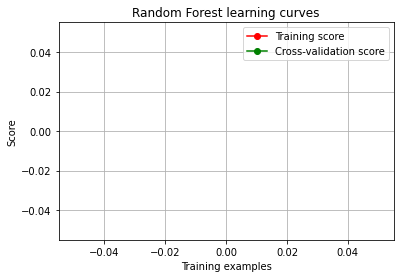

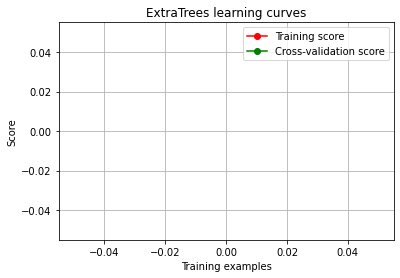

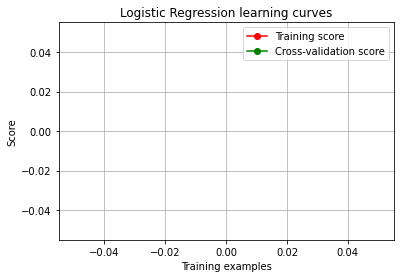

In [ ]:
g = plot_learning_curve(RFC_best,"Random Forest learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(Ext_best,"ExtraTrees learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(LGS_best,"Logistic Regression learning curves",X_train,Y_train,cv=kfold)

In [ ]:
#튜닝한 파라미터로 하드보팅한 후 점수를 출력해보자.
grid_hard = VotingClassifier(estimators = [('Random Forest', RFC_best),
                                           ('ExtraTrees', Ext_best),
                                           ('Logistic Regression', LGS_best)], voting = 'hard')

grid_hard_cv = model_selection.cross_validate(grid_hard, X_train, Y_train, cv=10)

print("Hard voting on test set score mean: {:.2f}". format(grid_hard_cv['test_score'].mean() * 100))

Hard voting on test set score mean: nan


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_voting.py", line 324, in fit
    return super().fit(X, transformed_y, sample_weight)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_voting.py", line 83, in fit
    for idx, clf in enumerate(clfs)
  File "/usr/local/lib/python3.7/dist-pa

In [ ]:
#튜닝한 파라미터로 하드보팅
grid_soft = VotingClassifier(estimators = [('Random Forest', RFC_best),
                                           ('ExtraTrees', Ext_best),
                                           ('Logistic Regression', LGS_best)], voting = 'soft')

grid_soft_cv = model_selection.cross_validate(grid_soft, X_train, Y_train, cv=10)

print("Soft voting on test set score mean: {:.2f}". format(grid_soft_cv['test_score'].mean() * 100))

Soft voting on test set score mean: nan


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_voting.py", line 324, in fit
    return super().fit(X, transformed_y, sample_weight)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_voting.py", line 83, in fit
    for idx, clf in enumerate(clfs)
  File "/usr/local/lib/python3.7/dist-pa